<a href="https://colab.research.google.com/github/og-hayden/ai-ml/blob/main/PyTorch_Computer_Vision_Multi_class_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [88]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [89]:
# Getting dataset
train_data = datasets.FashionMNIST(
    root="data", # where to download data
    train=True, # do we want training dataset
    download=True,
    transform=ToTensor(), # convert data to tensors
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data", # where to download data
    train=False, # do we want training dataset
    download=True,
    transform=ToTensor(), # convert data to tensors
    target_transform=None
)

In [90]:
len(train_data), len(test_data)

(60000, 10000)

In [91]:
# see training example
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [92]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Shape: torch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

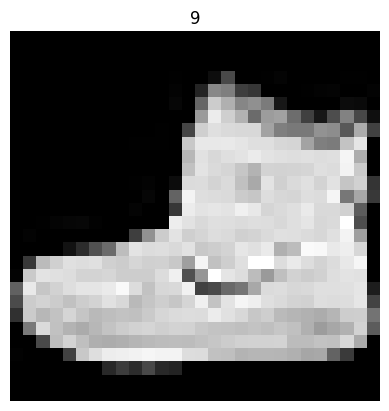

In [93]:
# visualizing images
image, label = train_data[0]
print(f"Shape: {image.shape}")
plt.imshow(image.squeeze(), cmap="gray")
plt.title(label)
plt.axis(False)

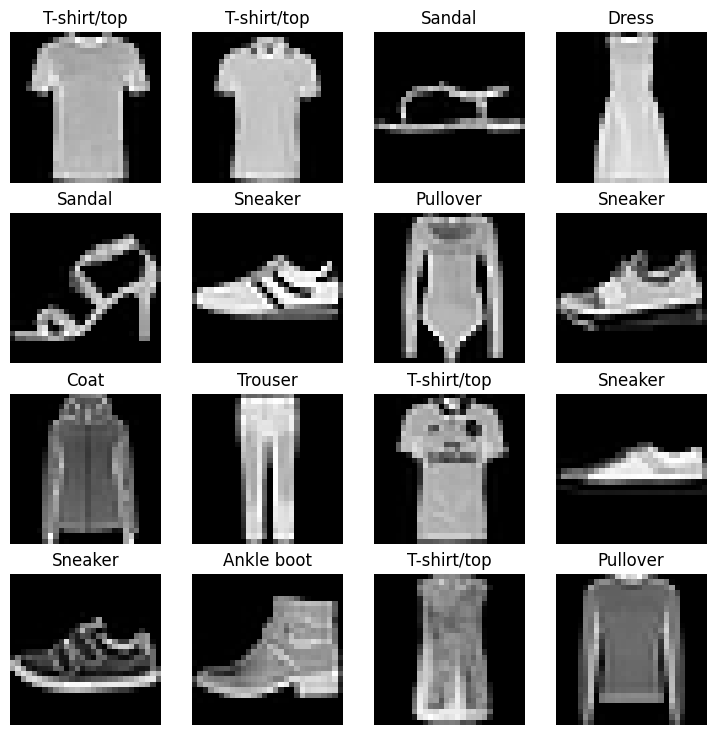

In [94]:
# Plot more images
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

In [95]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

In [96]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

In [97]:
torch.manual_seed=42

model_0 = FashionMNISTModelV0(1, # because 28x28 pixel inputs
                              10, # hyperparameter
                              len(class_names)) # num classes
model_0.to(device)

FashionMNISTModelV0(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [98]:
!pip install torchmetrics

In [99]:
from torchmetrics.classification import MulticlassAccuracy

In [100]:
accuracy_fn = MulticlassAccuracy(num_classes=10, top_k=1).to(device)

In [101]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(),
                             lr=0.001)

In [102]:
epochs = 10

# For data viz
train_history = {}
test_history = {}
test_acc = {}

# Early stopping
patience = 2
num_unimproved_epochs = 0
best_loss = float('inf')

# Training/testing loop
for epoch in range(epochs):
  # Training loop
  train_loss = 0
  for batch_X, batch_y in train_dataloader:
    batch_X, batch_y = batch_X.to(device), batch_y.to(device)
    model_0.train()
    optimizer.zero_grad()
    y_logits = model_0(batch_X).squeeze()
    loss = loss_fn(y_logits, batch_y)
    train_loss += loss # add loss to each batch
    loss.backward()
    optimizer.step()
  train_loss /= len(train_dataloader)
  train_history[epoch] = train_loss # add to history

  # Testing loop
  test_loss = 0
  test_accuracy = 0
  for batch_X, batch_y in test_dataloader:
    model_0.eval()
    batch_X, batch_y = batch_X.to(device), batch_y.to(device)
    with torch.inference_mode():
      y_test_logits = model_0(batch_X).squeeze()
      loss = loss_fn(y_test_logits, batch_y)
      test_loss += loss
      acc = accuracy_fn(y_test_logits, batch_y)
      test_accuracy += acc
  test_loss = test_loss / len(test_dataloader)
  test_accuracy = test_accuracy / len(test_dataloader)
  test_history[epoch] = test_loss
  test_acc[epoch] = test_accuracy

  print(f"Epoch {epoch}/{epochs} | Train Loss: {train_loss} | Test Loss: {test_loss} | Test Accuracy: {test_accuracy}")

  # Early stopping mechanism
  if test_loss < best_loss:
    num_unimproved_epochs = 0
    best_loss = test_loss
    best_params = model_0.state_dict()
  else:
    num_unimproved_epochs += 1

  if num_unimproved_epochs > patience:
    print(f"Early stopping at epoch {epoch}.")
    model_0.load_state_dict(best_params)
    break

Epoch 0/10 | Train Loss: 0.5343204736709595 | Test Loss: 0.40884843468666077 | Test Accuracy: 0.8433536291122437
Epoch 1/10 | Train Loss: 0.34771019220352173 | Test Loss: 0.33704498410224915 | Test Accuracy: 0.8694967031478882
Epoch 2/10 | Train Loss: 0.30875521898269653 | Test Loss: 0.3232262134552002 | Test Accuracy: 0.8805936574935913
Epoch 3/10 | Train Loss: 0.28584033250808716 | Test Loss: 0.3016190528869629 | Test Accuracy: 0.8837904930114746
Epoch 4/10 | Train Loss: 0.26640111207962036 | Test Loss: 0.299769788980484 | Test Accuracy: 0.8884947299957275
Epoch 5/10 | Train Loss: 0.2534671425819397 | Test Loss: 0.28028732538223267 | Test Accuracy: 0.8932337164878845
Epoch 6/10 | Train Loss: 0.24450410902500153 | Test Loss: 0.2966599464416504 | Test Accuracy: 0.8839836716651917
Epoch 7/10 | Train Loss: 0.23542773723602295 | Test Loss: 0.2797783613204956 | Test Accuracy: 0.8944823741912842
Epoch 8/10 | Train Loss: 0.22761410474777222 | Test Loss: 0.26637351512908936 | Test Accuracy: 0

In [108]:
with torch.inference_mode():
  train_epochs = list(train_history.keys())
  train_losses = list(train_history.values())
  train_losses = [item.cpu().numpy() for item in train_losses]

  test_epochs = list(test_history.keys())
  test_losses = list(test_history.values())
  test_losses = [item.cpu().numpy() for item in test_losses]

  acc_epochs = list(test_acc.keys())
  acc_values = list(test_acc.values())
  acc_values = [item.cpu().numpy() for item in acc_values]

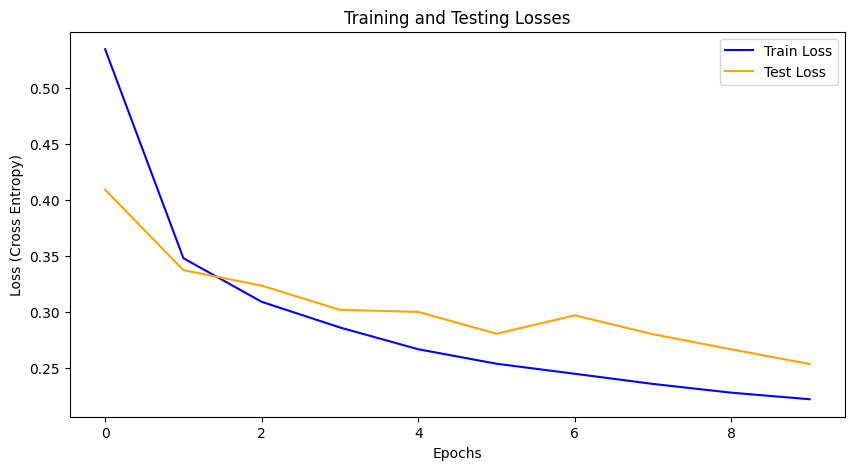

In [109]:
plt.figure(figsize=(10, 5))
plt.title("Training and Testing Losses")
plt.xlabel("Epochs")
plt.ylabel("Loss (Cross Entropy)")
plt.plot(train_epochs, train_losses, label="Train Loss", color="blue")
plt.plot(test_epochs, test_losses, label="Test Loss", color="orange")
plt.legend()

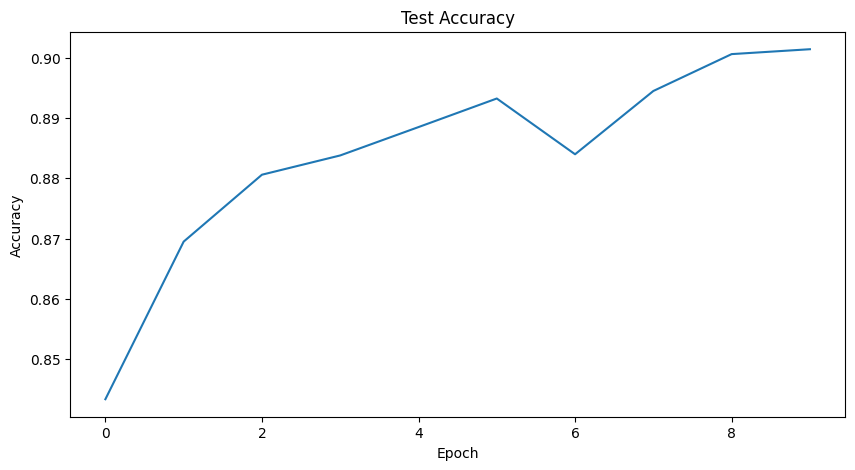

In [110]:
plt.figure(figsize=(10, 5))
plt.title("Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(acc_epochs, acc_values)
plt.show()